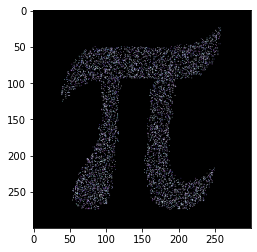

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.mixture import GaussianMixture

# Load the required data
xs = np.load('pi_xs.npy')
ys = np.load('pi_ys.npy')
image_array = np.array(Image.open('sparse_pi_colored.jpg'))
rgb_values = image_array[xs, ys]
rgb_values = rgb_values.astype('float32') / 255.0

# Concatenate the x, y coordinates and RGB values
data = np.concatenate([xs.reshape(-1, 1), ys.reshape(-1, 1), rgb_values], axis=1)

# Train the GMM
num_components = 128 # Number of mixture components in the GMM
gmm = GaussianMixture(n_components=num_components, covariance_type='diag')
gmm.fit(data)

# Generate new samples
num_samples = 5000 # Number of samples to generate
# z_dim = 32 # Dimension of the random noise input
# z = np.random.randn(num_samples, z_dim)
# samples = gmm.sample(z)[0]
samples = gmm.sample(num_samples)[0]

# Map the generated samples back to RGB values
generated_rgb = samples[:, 2:]
generated_rgb = np.clip(generated_rgb, 0, 1) * 255.0
generated_rgb = generated_rgb.astype('uint8')

# Visualize the generated image
generated_image = np.zeros_like(image_array)
generated_image[xs, ys] = generated_rgb
plt.imshow(generated_image, cmap='gray')
plt.show()
